# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import (KBinsDiscretizer, OneHotEncoder, StandardScaler)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer)

In [227]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names
countries.head(5)
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [213]:
# Análise começa aqui:
df = countries
df = df.replace(',', '.', regex = True) # substituir separador decimal do dataframe de  ',' por '.'
df = pd.concat([df.iloc[:,:2].reset_index(drop=True), df.iloc[:, 2:].astype('float').reset_index(drop=True)] , axis=1) # converter formato de todas as features numéricas para 'float'
df_object = df.select_dtypes(['object']) # selecionar as features com formato 'object'
df[df_object.columns] = df_object.apply(lambda x: x.str.strip()) # remover espaços em todas as linhas antes e depois das strings
df.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997.0,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655.0,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091.0,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794.0,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201.0,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [214]:
df.dtypes # verificar os novos formatos

Country              object
Region               object
Population          float64
Area                float64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [215]:
def q1():
    region = df['Region'] # selcionar a feature 'Region'
    return region.sort_values().unique().tolist()# retornar os valores únicos e em ordem alfabética em formato 'list'

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [216]:
def q2():
    pop_density = df[['Pop_density']] # selecionar a feature 'Pop_density'
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile') # inicializar a classe 'KBinsDiscretizer' com os parâmetros informados
    discretizer.fit(pop_density) # Ajustar os dados da feature 'pop_density'
    score_bins = discretizer.transform(pop_density) # Transformar os dados ajustados
    return len(score_bins[score_bins>=9]) # retornar a quantidade de países acima de 90°percentil
# outra opção: return len([i[0] for i in score_bins.tolist() if i[0]>=9])

## Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [235]:
def q3():
    region_climate = df[['Region', 'Climate']].fillna(0) # selecionar as features ['Region', 'Climate'] e preencher linhas vazias com 'zeros'
    one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int) # inicializar a classe 'OneHotEncoder'
    region_climate_enconder = one_hot_encoder.fit_transform(region_climate) # Ajustar e transformar os dados das features selecionadas
    return region_climate_enconder.shape[1] # retornar a quantidade de features criadas

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [218]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [219]:
def q4():
    df_num_columns = df.select_dtypes(include=[np.number]) # selecionar as features com valores númericos
    pipeline = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")), 
        ('scale', StandardScaler())]) # Inicializar a classe 'Pipeline', com os parâmetros passados
    pipeline.fit(df_num_columns) # Ajustar os dados das features selecionadas
    transformed_test_country = pipeline.transform([test_country[2:]]) # Transformar os dados da lista 'test_country' utilizando a pipeline ajustada
    arable = transformed_test_country[:, df_num_columns.columns.get_loc('Arable')] # Buscar o valor da feature 'Arable' nos dados transformados
    return float(arable.round(3)) # retornar o valor como float e 3 casas decimais

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [230]:
def q5():
    net_migration = df['Net_migration'].dropna() # Selecionar a feature 'Net_migration' e remover linhas vazias
    q1, q3 = np.quantile(net_migration, [.25, .75]) # Obter o 1° quartil e 3° quartil
    iqr = q3 - q1 # Intervalo entre quartis
    limit_up, limit_low = q3 + 1.5 * iqr, q1 - 1.5 * iqr # Definir os limites superior e inferior
    outliers_up, outliers_low = sum(net_migration>limit_up), sum(net_migration<limit_low) # Quantidade de outliers acima do limite superior e abaixo do limite inferior
    return (outliers_low, outliers_up, False) # retornar a quantidade de outliers e se serão removidos
    # Com base nos gráficos (boxplot, distribuição normal e dispersão) e na análise dos dados, concluiu-se que 50 % dos valores da base de dados (net_migration) são zeros ou outliers, 
    # além disso cada valor representa um país, sendo assim não deve-se remover os outilers.
q5()

(26, 24, False)

C:\Users\Moacir\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


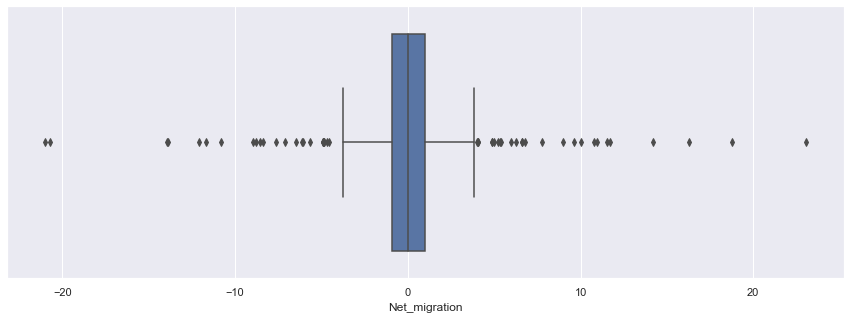

In [221]:
# Plotar boxplot da feature
#plt.figure(figsize=(15,5))
#sns.boxplot(net_migration)
#fig.show()

C:\Users\Moacir\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


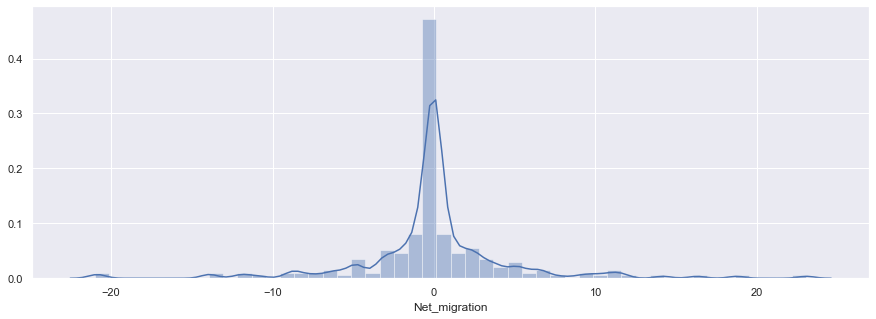

In [222]:
# Plotar gráfico de distruição dos dados
#plt.figure(figsize=(15,5))
#sns.distplot(net_migration)
#fig.show()

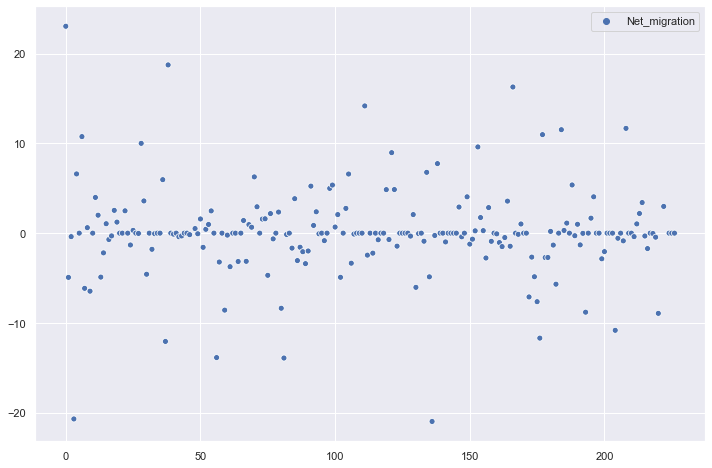

In [223]:
# Plotar gráfico de dispersão
#sns.scatterplot(data=df[['Net_migration']].dropna())

In [224]:
#values_zero = net_migration[(net_migration<limit_up) & (net_migration>limit_low)].value_counts()[0] # Quantidade de zeros nos dados
#pct_zeros = values_zero/ net_migration.shape[0] # Percentual de zeros na feature
#pct_outliers = (outliers_low + outliers_up) / net_migration.shape[0] # Percentual de outliers nos dados
#(pct_zeros, pct_outliers, pct_zeros + pct_outliers) # Percentual total

(0.2767857142857143, 0.22321428571428573, 0.5)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [225]:
# Importa base de dados
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles'] # Definir as categorias que serão importadas
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42) # Definir parâmetros iniciais para importação da base de dados
word = ['phone'] # Palavra a ser utilizada

In [167]:
def q6():
    count_vect = CountVectorizer(vocabulary = word) # Inicializar a classe 'CountVectorizer' com o parãmetro 'word' previamente definido
    count_vect_fit = count_vect.fit_transform(newsgroup.data) # Ajustar os dados selecionados
    return int(count_vect_fit.sum()) # Retornar a número de fezes que aparece a palavra 'phone'

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [226]:
def q7():
    tfidf_vect = TfidfVectorizer() # Inicializar a classe 'TfidVectorizer'
    tfidf_vect_fit = tfidf_vect.fit_transform(newsgroup.data) # Ajustar e transformar os dados da feature selecionada
    names = tfidf_vect.get_feature_names() # Obter os nomes
    data = tfidf_vect_fit.toarray() # Obter os dados ajustados e transformados
    df = pd.DataFrame(data, columns = names) # Criar um data frame com os nomes e dados
    return float(df['phone'].sum().round(3)) # Returnar o 'TF-IDF' da palavra 'phone'